<a href="https://colab.research.google.com/github/marissakaniski/FIrst-Repository/blob/main/WageFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load 2017 dataset
df17 = pd.read_csv('dataset2017.csv')
admin_df17 = df17[(df17['OCC_CODE'].str.startswith('43-')) & (df17['OCC_CODE'] != '43-0000')]

columns_to_clean_all = [
    'TOT_EMP', 'EMP_PRSE', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE',
    'H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90',
    'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90',
    'ANNUAL', 'HOURLY'
]

# Clean dataset17
for col in columns_to_clean_all:
    admin_df17.loc[:, col] = (
        admin_df17[col]
        .replace('#', '', regex=False)
        .replace('*', '', regex=False)
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('nan', np.nan)
        .astype(float)
    )

admin_df17_clean = admin_df17.dropna(subset=['A_MEAN', 'H_MEAN', 'A_MEDIAN'])

# Load 2020 dataset
df20 = pd.read_csv('dataset2020.csv')
admin_df20 = df20[(df20['OCC_CODE'].str.startswith('43-')) & (df20['OCC_CODE'] != '43-0000')]

# Clean dataset20
for col in columns_to_clean_all:
    admin_df20.loc[:, col] = (
        admin_df20[col]
        .replace('#', '', regex=False)
        .replace('*', '', regex=False)
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('nan', np.nan)
        .astype(float)
    )

admin_df20_clean = admin_df20.dropna(subset=['A_MEAN', 'H_MEAN', 'A_MEDIAN'])

# Load 2023 dataset
df23 = pd.read_csv("dataset2023.csv")
admin_df23 = df23[(df23['OCC_CODE'].str.startswith('43-')) & (df23['OCC_CODE'] != '43-0000')]

# Clean dataset23
for col in columns_to_clean_all:
    admin_df23.loc[:, col] = (
        admin_df23[col]
        .replace('#', '', regex=False)
        .replace('*', '', regex=False)
        .astype(str)
        .str.replace(',', '', regex=False)
        .replace('nan', np.nan)
        .astype(float)
    )

admin_df23_clean = admin_df23.dropna(subset=['A_MEAN', 'H_MEAN', 'A_MEDIAN'])

# Optional inflation adjustment for 2017 to 2023 dollars
inflation_factor = 305.0 / 246.5
for col in ['A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90']:
    admin_df17_clean[col] = admin_df17_clean[col] * inflation_factor

# Optional inflation adjustment for 2020 to 2023 dollars (CPI est. 2020 = 258.8)
inflation_factor_2020 = 305.0 / 258.8
for col in ['A_MEAN', 'A_MEDIAN', 'A_PCT10', 'A_PCT25', 'A_PCT75', 'A_PCT90']:
    admin_df20_clean[col] = admin_df20_clean[col] * inflation_factor_2020

# Drop duplicates
admin_df17_clean = admin_df17_clean.drop_duplicates(subset='OCC_TITLE')
admin_df20_clean = admin_df20_clean.drop_duplicates(subset='OCC_TITLE')
admin_df23_clean = admin_df23_clean.drop_duplicates(subset='OCC_TITLE')


<ipython-input-1-9a183ad98f36>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('nan', np.nan)
<ipython-input-1-9a183ad98f36>:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('nan', np.nan)
<ipython-input-1-9a183ad98f36>:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('nan

In [ ]:
admin_df17_clean[['A_PCT25', 'A_MEDIAN', 'A_PCT75']].describe()

,A_PCT25,A_MEDIAN,A_PCT75
count,70.000000,70.000000,70.000000
unique,64.000000,61.000000,64.000000
top,52338.742394,44036.308316,86946.653144
freq,2.000000,3.000000,2.000000


In [ ]:
admin_df20_clean[['A_PCT25', 'A_MEDIAN', 'A_PCT75']].describe()

,A_PCT25,A_MEDIAN,A_PCT75
count,68.000000,68.00000,68.000000
unique,62.000000,63.00000,63.000000
top,52915.378671,68884.27357,87988.021638
freq,2.000000,2.00000,2.000000


In [ ]:
admin_df23_clean[['A_PCT25', 'A_MEDIAN', 'A_PCT75']].describe()

,A_PCT25,A_MEDIAN,A_PCT75
count,68.0,68.0,68.0
unique,61.0,63.0,62.0
top,50160.0,63450.0,79690.0
freq,2.0,2.0,2.0


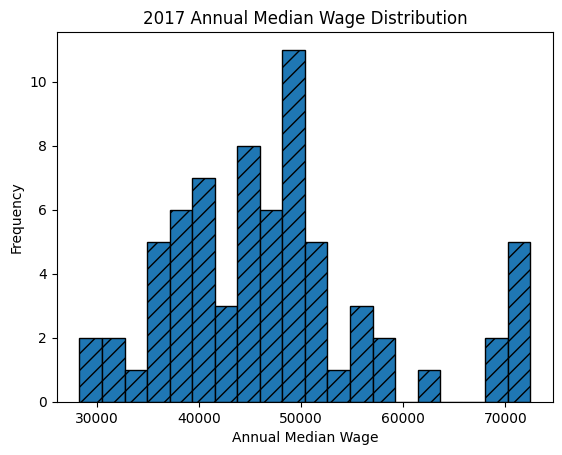

In [ ]:
plt.hist(admin_df17_clean['A_MEDIAN'], bins=20, edgecolor='black', hatch='//')
plt.title("2017 Annual Median Wage Distribution")
plt.xlabel("Annual Median Wage")
plt.ylabel("Frequency")
plt.show()

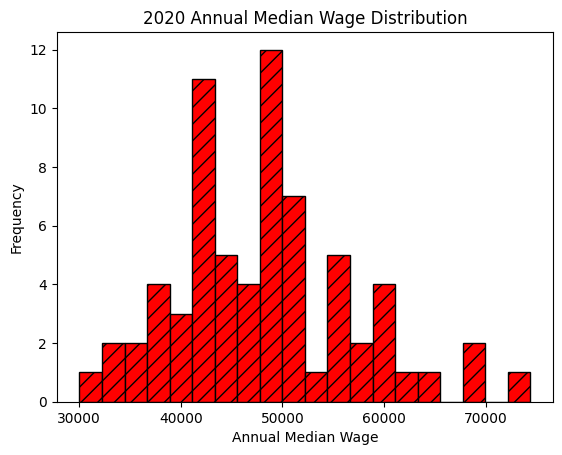

In [ ]:
plt.hist(admin_df20_clean['A_MEDIAN'], bins=20, color='red', edgecolor='black', hatch='//')
plt.title("2020 Annual Median Wage Distribution")
plt.xlabel("Annual Median Wage")
plt.ylabel("Frequency")
plt.show()


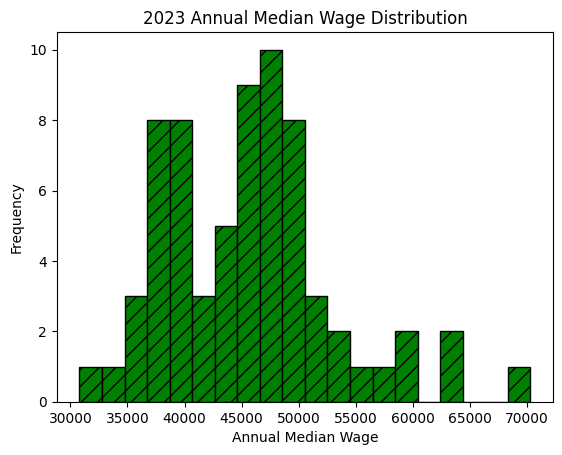

In [ ]:
plt.hist(admin_df23_clean['A_MEDIAN'], bins=20, color='green', edgecolor='black', hatch='//')
plt.title("2023 Annual Median Wage Distribution")
plt.xlabel("Annual Median Wage")
plt.ylabel("Frequency")
plt.show()

<ipython-input-8-5ad36d9eeb55>:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, vert=True, patch_artist=True, labels=labels)


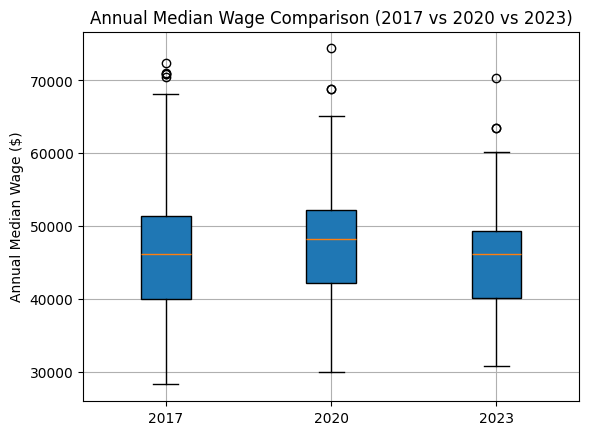

In [ ]:
import matplotlib.pyplot as plt

# Data for both years
data = [
    admin_df17_clean['A_MEDIAN'],
    admin_df20_clean['A_MEDIAN'],
    admin_df23_clean['A_MEDIAN']
]

# Labels for the boxplots
labels = ['2017',  '2020', '2023']

# Plot side-by-side boxplots
plt.boxplot(data, vert=True, patch_artist=True, labels=labels)

plt.title("Annual Median Wage Comparison (2017 vs 2020 vs 2023)")
plt.ylabel("Annual Median Wage ($)")
plt.grid(True)
plt.show()


In [ ]:
admin_df17_clean.sort_values('A_MEDIAN', ascending=False)[['OCC_TITLE', 'A_MEDIAN']].head(10)

,OCC_TITLE,A_MEDIAN
876,Postal Service Clerks,72445.233266
889,Executive Secretaries and Executive Administra...,71034.685598
875,Postal Service Workers,70849.087221
878,"Postal Service Mail Sorters, Processors, and P...",70849.087221
877,Postal Service Mail Carriers,70527.383367
804,First-Line Supervisors of Office and Administr...,68126.977688
803,Supervisors of Office and Administrative Suppo...,68126.977688
831,Brokerage Clerks,61618.661258
911,Statistical Assistants,58649.087221
879,"Production, Planning, and Expediting Clerks",57745.841785


In [ ]:
admin_df20_clean.sort_values('A_MEDIAN', ascending=False)[['OCC_TITLE', 'A_MEDIAN']].head(10)

,OCC_TITLE,A_MEDIAN
856,Executive Secretaries and Executive Administra...,74376.159196
772,Supervisors of Office and Administrative Suppo...,68884.27357
773,First-Line Supervisors of Office and Administr...,68884.27357
800,Brokerage Clerks,65136.591963
847,"Postal Service Mail Sorters, Processors, and P...",62626.352396
844,Postal Service Workers,60281.1051
846,Postal Service Mail Carriers,60198.608964
876,Statistical Assistants,59350.07728
845,Postal Service Clerks,59102.588872
848,"Production, Planning, and Expediting Clerks",58501.545595


In [ ]:
admin_df23_clean.sort_values('A_MEDIAN', ascending=False)[['OCC_TITLE', 'A_MEDIAN']].head(10)

,OCC_TITLE,A_MEDIAN
919,Executive Secretaries and Executive Administra...,70310.0
835,Supervisors of Office and Administrative Suppo...,63450.0
836,First-Line Supervisors of Office and Administr...,63450.0
863,Brokerage Clerks,60150.0
908,Postal Service Clerks,59570.0
907,Postal Service Workers,56510.0
909,Postal Service Mail Carriers,56330.0
911,"Production, Planning, and Expediting Clerks",53900.0
910,"Postal Service Mail Sorters, Processors, and P...",53440.0
854,Payroll and Timekeeping Clerks,52240.0


In [ ]:
admin_df17_clean['IQR'] = admin_df17_clean['A_PCT75'] - admin_df17_clean['A_PCT25']
admin_df23_clean['IQR'] = admin_df23_clean['A_PCT75'] - admin_df23_clean['A_PCT25']



In [ ]:
admin_df23_clean[['OCC_TITLE' , 'IQR']].sort_values('IQR', ascending=False).head(10)

,OCC_TITLE,IQR
927,Desktop Publishers,33070.0
835,Supervisors of Office and Administrative Suppo...,29530.0
836,First-Line Supervisors of Office and Administr...,29530.0
909,Postal Service Mail Carriers,29270.0
905,"Meter Readers, Utilities",27940.0
910,"Postal Service Mail Sorters, Processors, and P...",27930.0
919,Executive Secretaries and Executive Administra...,27900.0
907,Postal Service Workers,25810.0
920,Legal Secretaries and Administrative Assistants,25060.0
911,"Production, Planning, and Expediting Clerks",22960.0


In [ ]:
admin_df17_clean[['OCC_TITLE' , 'IQR']].sort_values('IQR', ascending=False).head(10)

,OCC_TITLE,IQR
803,Supervisors of Office and Administrative Suppo...,34607.910751
804,First-Line Supervisors of Office and Administr...,34607.910751
861,Reservation and Transportation Ticket Agents a...,34298.580122
889,Executive Secretaries and Executive Administra...,33556.186613
890,Legal Secretaries,32900.40568
899,Desktop Publishers,31960.040568
873,"Meter Readers, Utilities",30017.444219
879,"Production, Planning, and Expediting Clerks",29683.36714
877,Postal Service Mail Carriers,29250.30426
894,Computer Operators,28792.494929


In [ ]:
merged = pd.merge(
    admin_df17_clean[['OCC_TITLE', 'A_MEDIAN']],
    admin_df20_clean[['OCC_TITLE', 'A_MEDIAN']],
    on='OCC_TITLE',
    suffixes=('_2017', '_2020')
)

merged = pd.merge(
    merged,
    admin_df23_clean[['OCC_TITLE', 'A_MEDIAN']],
    on='OCC_TITLE'
)

# Rename the last A_MEDIAN column manually
merged = merged.rename(columns={'A_MEDIAN': 'A_MEDIAN_2023'})



<ipython-input-16-bf755c7a4a89>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


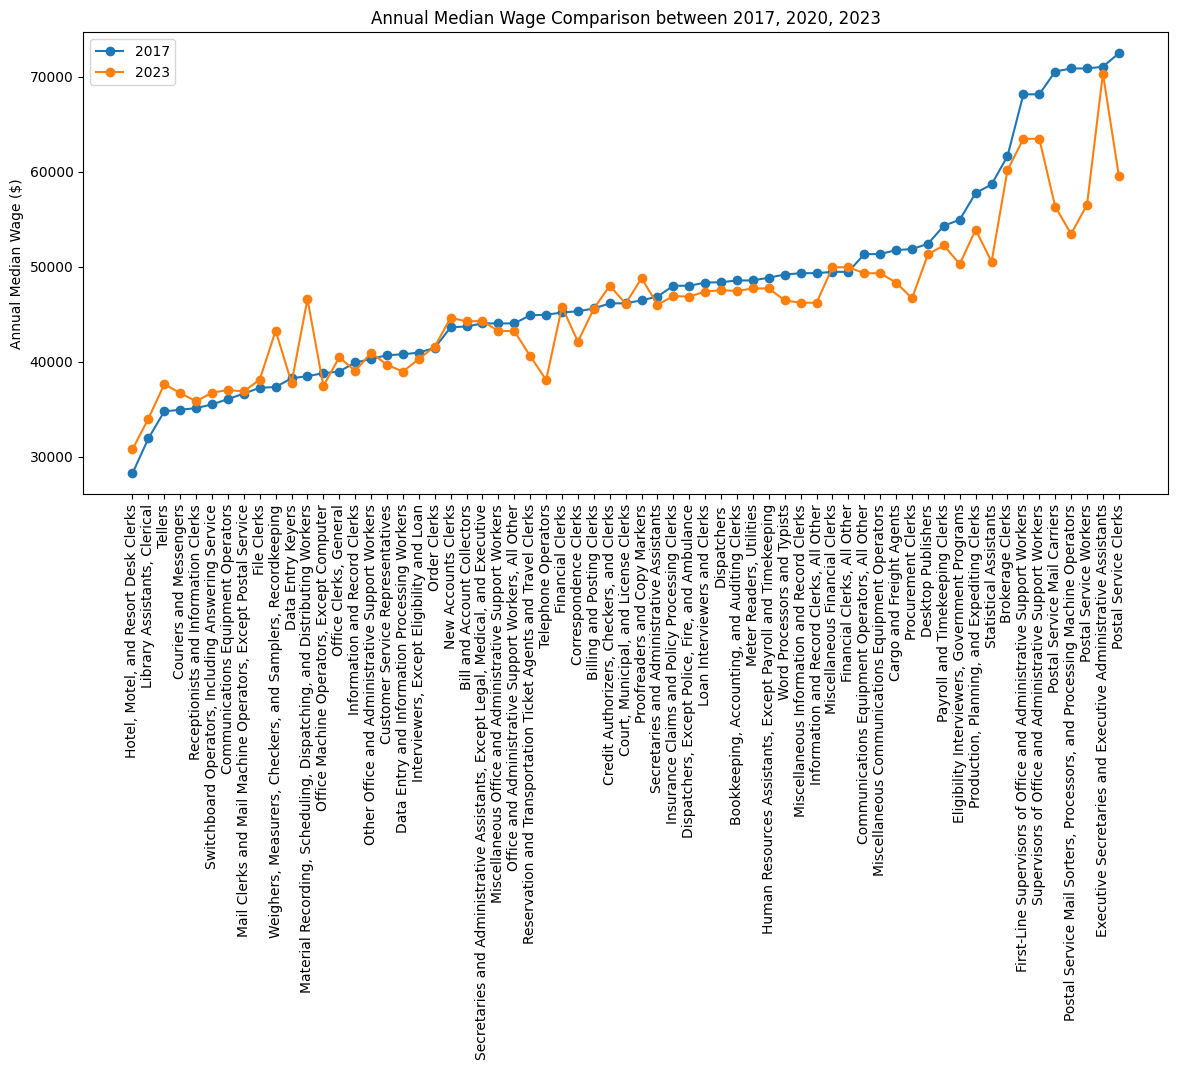

In [ ]:
merged_sorted = merged.sort_values('A_MEDIAN_2017')

plt.figure(figsize=(14, 6))
plt.plot(merged_sorted['OCC_TITLE'], merged_sorted['A_MEDIAN_2017'], label='2017', marker='o')
#plt.plot(merged_sorted['OCC_TITLE'], merged_sorted['A_MEDIAN_2020'], label='2020', marker='o')
plt.plot(merged_sorted['OCC_TITLE'], merged_sorted['A_MEDIAN_2023'], label='2023', marker='o')
plt.xticks(rotation=90)
plt.ylabel('Annual Median Wage ($)')
plt.title('Annual Median Wage Comparison between 2017, 2020, 2023')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calculate percentage change from 2017 to 2023
merged['pct_change_17_23'] = ((merged['A_MEDIAN_2023'] - merged['A_MEDIAN_2017']) / merged['A_MEDIAN_2017']) * 100


# View top 10 jobs with highest increase
top_increases = merged.sort_values('pct_change_17_23', ascending=False)[['OCC_TITLE', 'pct_change_17_23']].head(10)

# View top 10 jobs with biggest decrease
top_decreases = merged.sort_values('pct_change_17_23')[['OCC_TITLE', 'pct_change_17_23']].head(13)

print("Top 10 Wage Increases (2017–2023):")
print(top_increases)

print("\nTop 10 Wage Decreases (2017–2023):")
print(top_decreases)


Top 10 Wage Increases (2017–2023):
                                            OCC_TITLE pct_change_17_23
35  Material Recording, Scheduling, Dispatching, a...        21.073586
46  Weighers, Measurers, Checkers, and Samplers, R...        15.873665
24               Hotel, Motel, and Resort Desk Clerks         8.903182
13                                            Tellers         8.219582
26                       Library Assistants, Clerical         6.527906
37                            Couriers and Messengers         5.022661
59                      Proofreaders and Copy Markers         5.011766
20           Credit Authorizers, Checkers, and Clerks         4.031758
57                             Office Clerks, General         3.859693
3   Switchboard Operators, Including Answering Ser...         3.488605

Top 10 Wage Decreases (2017–2023):
                                            OCC_TITLE pct_change_17_23
44  Postal Service Mail Sorters, Processors, and P...        -24.57207
41    

In [ ]:
# Merge data with necessary columns including IQR from 2017
merged = pd.merge(
    admin_df17_clean[['OCC_TITLE', 'A_MEDIAN', 'A_PCT25', 'A_PCT75', 'IQR']],
    admin_df20_clean[['OCC_TITLE', 'A_MEDIAN']],
    on='OCC_TITLE',
    suffixes=('_2017', '_2020')
)

merged = pd.merge(
    merged,
    admin_df23_clean[['OCC_TITLE', 'A_MEDIAN']],
    on='OCC_TITLE'
)

merged = merged.rename(columns={'A_MEDIAN': 'A_MEDIAN_2023'})


In [ ]:
# Create new categorical features for pattern mining
merged['Volatility'] = merged['IQR'].apply(lambda x: 'High_IQR' if x > merged['IQR'].median() else 'Low_IQR')

# if for each job, checking if its 2017 median wage is above the median of all jobs.
merged['Wage_Level_2017'] = merged['A_MEDIAN_2017'].apply(lambda x: 'High_Wage' if x > merged['A_MEDIAN_2017'].median() else 'Low_Wage')
merged['Wage_Trend'] = merged['A_MEDIAN_2023'] > merged['A_MEDIAN_2017']
merged['Wage_Trend'] = merged['Wage_Trend'].map({True: 'Increase', False: 'Decrease'})


In [ ]:
# Only include meaningful categorical features for pattern mining
pattern_cols = ['Wage_Trend', 'Volatility', 'Wage_Level_2017']
binary_data = pd.get_dummies(merged[pattern_cols])
binary_data = binary_data.astype(bool).astype(int)


In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules

#FP-Growth algorithm
frequent_itemsets = fpgrowth(binary_data, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
rules



/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Wage_Trend_Decrease),(Wage_Level_2017_High_Wage),0.650794,0.492063,0.444444,0.682927,1.387884,1.0,0.124213,1.601954,0.800325,0.636364,0.375762,0.793076
1,(Wage_Level_2017_High_Wage),(Wage_Trend_Decrease),0.492063,0.650794,0.444444,0.903226,1.387884,1.0,0.124213,3.608466,0.550223,0.636364,0.722874,0.793076
2,"(Wage_Level_2017_High_Wage, Volatility_Low_IQR)",(Wage_Trend_Decrease),0.095238,0.650794,0.095238,1.000000,1.536585,1.0,0.033258,inf,0.385965,0.146341,1.000000,0.573171
3,(Volatility_High_IQR),(Wage_Trend_Decrease),0.492063,0.650794,0.412698,0.838710,1.288749,1.0,0.092467,2.165079,0.441106,0.565217,0.538123,0.736428
4,(Wage_Trend_Decrease),(Volatility_High_IQR),0.650794,0.492063,0.412698,0.634146,1.288749,1.0,0.092467,1.388360,0.641608,0.565217,0.279726,0.736428
5,(Volatility_High_IQR),(Wage_Level_2017_High_Wage),0.492063,0.492063,0.396825,0.806452,1.638918,1.0,0.154699,2.624339,0.767500,0.675676,0.618952,0.806452
6,(Wage_Level_2017_High_Wage),(Volatility_High_IQR),0.492063,0.492063,0.396825,0.806452,1.638918,1.0,0.154699,2.624339,0.767500,0.675676,0.618952,0.806452
7,"(Volatility_High_IQR, Wage_Trend_Decrease)",(Wage_Level_2017_High_Wage),0.412698,0.492063,0.349206,0.846154,1.719603,1.0,0.146133,3.301587,0.712531,0.628571,0.697115,0.777916
8,"(Volatility_High_IQR, Wage_Level_2017_High_Wage)",(Wage_Trend_Decrease),0.396825,0.650794,0.349206,0.880000,1.352195,1.0,0.090955,2.910053,0.431818,0.500000,0.656364,0.708293
9,"(Wage_Trend_Decrease, Wage_Level_2017_High_Wage)",(Volatility_High_IQR),0.444444,0.492063,0.349206,0.785714,1.596774,1.0,0.130511,2.370370,0.672727,0.594595,0.578125,0.747696


In [ ]:
matched_jobs = merged[
    (merged['Wage_Level_2017'] == 'High_Wage') &
    (merged['Volatility'] == 'High_IQR') &
    (merged['Wage_Trend'] == 'Decrease')
]

matched_jobs[['OCC_TITLE', 'A_MEDIAN_2017', 'A_MEDIAN_2023', 'IQR']]


,OCC_TITLE,A_MEDIAN_2017,A_MEDIAN_2023,IQR
0,Supervisors of Office and Administrative Suppo...,68126.977688,63450.0,34607.910751
1,First-Line Supervisors of Office and Administr...,68126.977688,63450.0,34607.910751
5,Miscellaneous Communications Equipment Operators,51324.137931,49310.0,26590.060852
6,"Communications Equipment Operators, All Other",51324.137931,49310.0,26590.060852
10,"Bookkeeping, Accounting, and Auditing Clerks",48552.535497,47440.0,22222.312373
11,Payroll and Timekeeping Clerks,54306.085193,52240.0,22506.896552
17,Brokerage Clerks,61618.661258,60150.0,25649.69574
22,"Eligibility Interviewers, Government Programs",54937.119675,50270.0,22011.967546
33,Miscellaneous Information and Record Clerks,49319.675456,46210.0,21715.010142
34,"Information and Record Clerks, All Other",49319.675456,46210.0,21715.010142
